<a href="https://colab.research.google.com/github/rahul-727/Computer-vision-lab-work/blob/main/2348544_CV_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

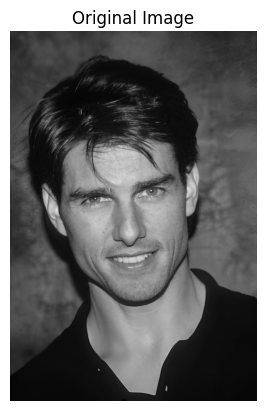

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import median_filter, maximum_filter, minimum_filter

image_gray = cv2.imread('/content/Films.jpeg', 0)

plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Median Filter
Purpose: Noise Reduction

* How it works: The median filter replaces each pixel's value with the
median value of the intensities in its neighborhood. This is particularly effective at removing "salt and pepper" noise without significantly blurring the edges of objects in the image.

* Effect on the image: It smooths the image while preserving edges and reducing noise, making it useful for preparing images for further processing steps, like edge detection.

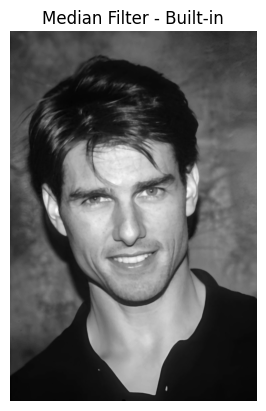

In [15]:
filtered_image = cv2.medianBlur(image_gray, 5)

plt.imshow(filtered_image, cmap='gray')
plt.title('Median Filter - Built-in')
plt.axis('off')
plt.show()

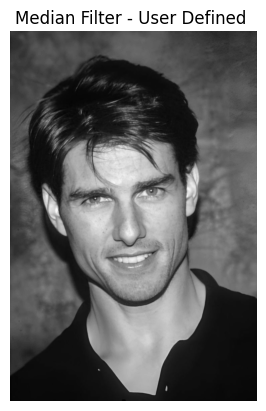

In [16]:
# user-defined

def median_filter_custom(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), 'constant')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])
    return output_image

custom_median = median_filter_custom(image_gray)

plt.imshow(custom_median, cmap='gray')
plt.title('Median Filter - User Defined ')
plt.axis('off')
plt.show()

# Max and Min Filters
Purpose: Highlight or Suppress Specific Features

Max Filter:

* How it works: It replaces each pixel with the maximum value in its neighborhood. This has the effect of emphasizing bright regions surrounded by darker pixels.
* Effect on the image: It can enhance brightness and is often used for detecting bright features on a dark background, such as stars in the night sky, or for morphological operations.

Min Filter:

* How it works: This filter does the opposite of the max filter, replacing each pixel with the minimum value in its neighborhood.
* Effect on the image: It's useful for emphasizing dark regions and can suppress bright spots on a generally bright background. It's also used in morphological operations.

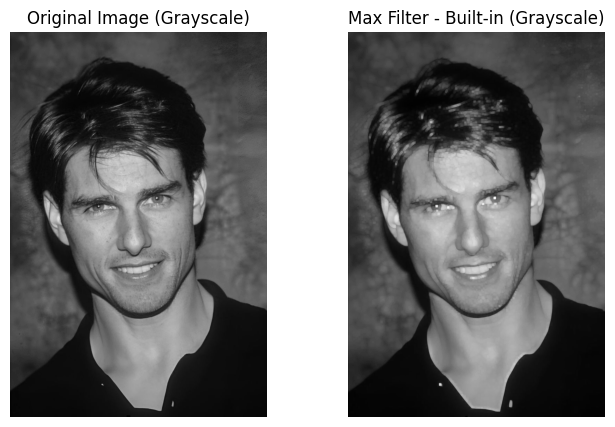

In [17]:
# Built-in

max_filtered = cv2.dilate(image_gray, np.ones((5, 5), np.uint8))

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(max_filtered, cmap='gray')
plt.title('Max Filter - Built-in (Grayscale)')
plt.axis('off')

plt.show()

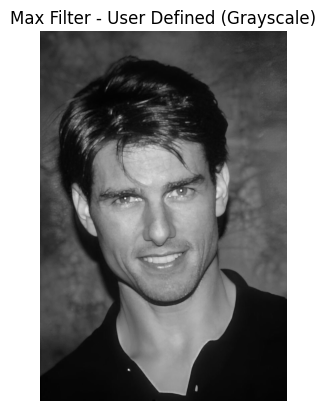

In [18]:
# user-defined

def max_filter_custom(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), 'reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.max(neighborhood)
    return output_image

custom_max = max_filter_custom(image_gray)

plt.imshow(custom_max, cmap='gray')
plt.title('Max Filter - User Defined (Grayscale)')
plt.axis('off')
plt.show()

Min-filter

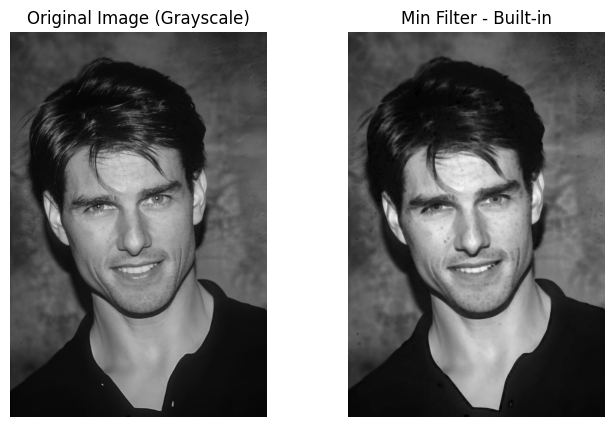

In [19]:
# Built-in

min_filtered = cv2.erode(image_gray, np.ones((5, 5), np.uint8))

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(min_filtered, cmap='gray')
plt.title('Min Filter - Built-in')
plt.axis('off')
plt.show()

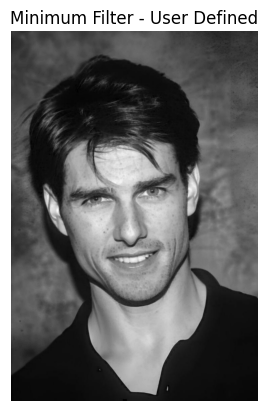

In [20]:
# User-defined

def min_filter_custom(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), 'constant', constant_values=255)
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.min(neighborhood)
    return output_image

min_filtered_image = min_filter_custom(image_gray)

plt.imshow(min_filtered_image, cmap='gray')
plt.title('Minimum Filter - User Defined')
plt.axis('off')
plt.show()

# Mid-point Filter

Purpose: Noise Reduction and Smoothing

* How it works: The mid-point filter calculates the mean of the maximum and minimum intensities in the pixel's neighborhood.
* Effect on the image: This filter provides a balance between the effects of the max and min filters, offering smoothing that is less sensitive to extreme values than a simple average. It can be particularly effective for random noise while preserving the brightness range of the image.

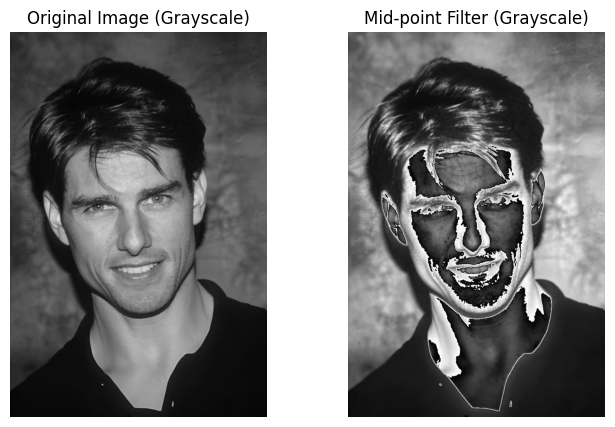

In [28]:
# There's no direct built-in function

def midpoint_filter_grayscale(image, kernel_size=3):
    max_filter = maximum_filter(image, size=kernel_size)
    min_filter = minimum_filter(image, size=kernel_size)
    midpoint_image = (max_filter + min_filter) / 2
    return midpoint_image

midpoint_img_gray = midpoint_filter_grayscale(image_gray)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(midpoint_img_gray, cmap='gray')
plt.title('Mid-point Filter (Grayscale)')
plt.axis('off')
plt.show()



# Alpha-trimmed Mean Filter

Purpose: Noise Reduction, particularly in environments with specific types of noise

* How it works: This filter is a modified average that ignores the d/2 smallest and largest values in the neighborhood of a pixel, where d is the number of pixels to disregard specified by the alpha parameter. After trimming, the mean of the remaining pixels replaces the original pixel value.
* Effect on the image: It's especially useful in situations with mixed types of noise or in outlier removal, as it can reduce or eliminate the influence of extremely unrepresentative values in the calculation. By adjusting the amount of trimming (alpha), it can be adapted to different noise levels and types, offering a flexible approach to smoothing and noise reduction that can preserve important details in the image.


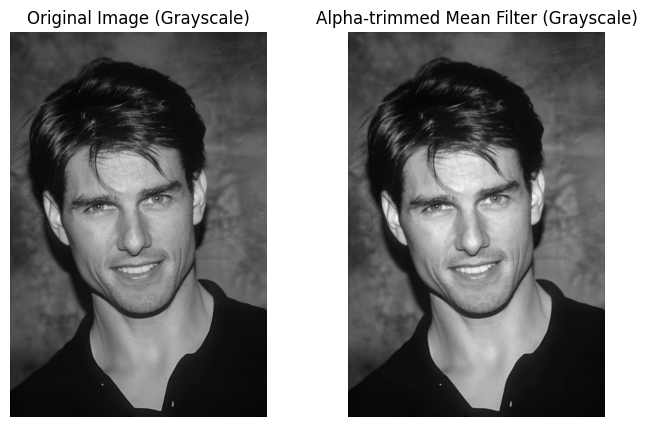

In [29]:
# for alpha-trimmed also no direct built in function is available

def alpha_trimmed_mean_filter_grayscale(image, kernel_size=3, alpha=2):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), 'constant')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            trimmed = np.sort(neighborhood)[alpha:-alpha]
            output_image[i, j] = np.mean(trimmed)
    return output_image

alpha_trimmed_img_gray = alpha_trimmed_mean_filter_grayscale(image_gray)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(alpha_trimmed_img_gray, cmap='gray')
plt.title('Alpha-trimmed Mean Filter (Grayscale)')
plt.axis('off')
plt.show()